# Initialize

In [ ]:
# Objective: Stroke prediction based on a few parameters

import pandas as pd
from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/dataset/stroke.csv")

df.head()

# Plot/visualize what other people should see

# (no longer using svm.SVC because it's a 2010 thing)

# Classification (Chapter 4)
# Std_Scaler + Logisticregression
# DecisionTree
# RandomForest

# BOOSTING

# VOTING

# Demonstrate if the classifiers are good enough (e.g. comparisons of their results
# using accuracy score, precision_score, recall_score, f1_score)

# FEATURE ENGINEERING

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

print("Gender: \n", df["gender"].value_counts())
print("Marriage: \n", df["ever_married"].value_counts())
print("Work: \n", df["work_type"].value_counts())
print("Residence: \n", df["Residence_type"].value_counts())
print("Smoking: \n", df["smoking_status"].value_counts())

# According to other code snippets, it's OK to use median/mean to fill in for missing data

# Check the NULL datasets
# Divide data into groups...

# Outlier
stroke = df.copy()
stroke = stroke[stroke["gender"] != "Other"]
# Removing these outliers give undesirable results, so we are going to keep them
# stroke = stroke[stroke["bmi"] <= 70]
# stroke = stroke[stroke["age"] >= 30]
print(stroke.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Gender: 
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Marriage: 
 Yes    3353
No     1757
Name: ever_married, dtype: int64
Work: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Swap gender with numerical values

gender_label_encoder = LabelEncoder()
stroke['gender'] = gender_label_encoder.fit_transform(stroke['gender'])
stroke['gender'].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

In [ ]:
# Marriage status with numerical values

ever_married_label_encoder = LabelEncoder()
stroke['ever_married'] = ever_married_label_encoder.fit_transform(stroke['ever_married'])
stroke['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [ ]:
# Work status with numerical values

work_type_label_encoder = LabelEncoder()
stroke['work_type'] = work_type_label_encoder.fit_transform(stroke['work_type'])
stroke['work_type'].value_counts()

2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [ ]:
# Urban and rural

residence_type_label_encoder = LabelEncoder()
stroke['Residence_type'] = residence_type_label_encoder.fit_transform(stroke['Residence_type'])
stroke['Residence_type'].value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

In [ ]:
# Smoking status

# stroke[stroke['smoking_status'] == 'Unknown'] = None
smoking_status_label_encoder = LabelEncoder()
stroke['smoking_status'] = smoking_status_label_encoder.fit_transform(stroke['smoking_status'])
stroke['smoking_status'].value_counts()

2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64

# plot


0
1
2
3
4
5
6
7
8
9
10
11


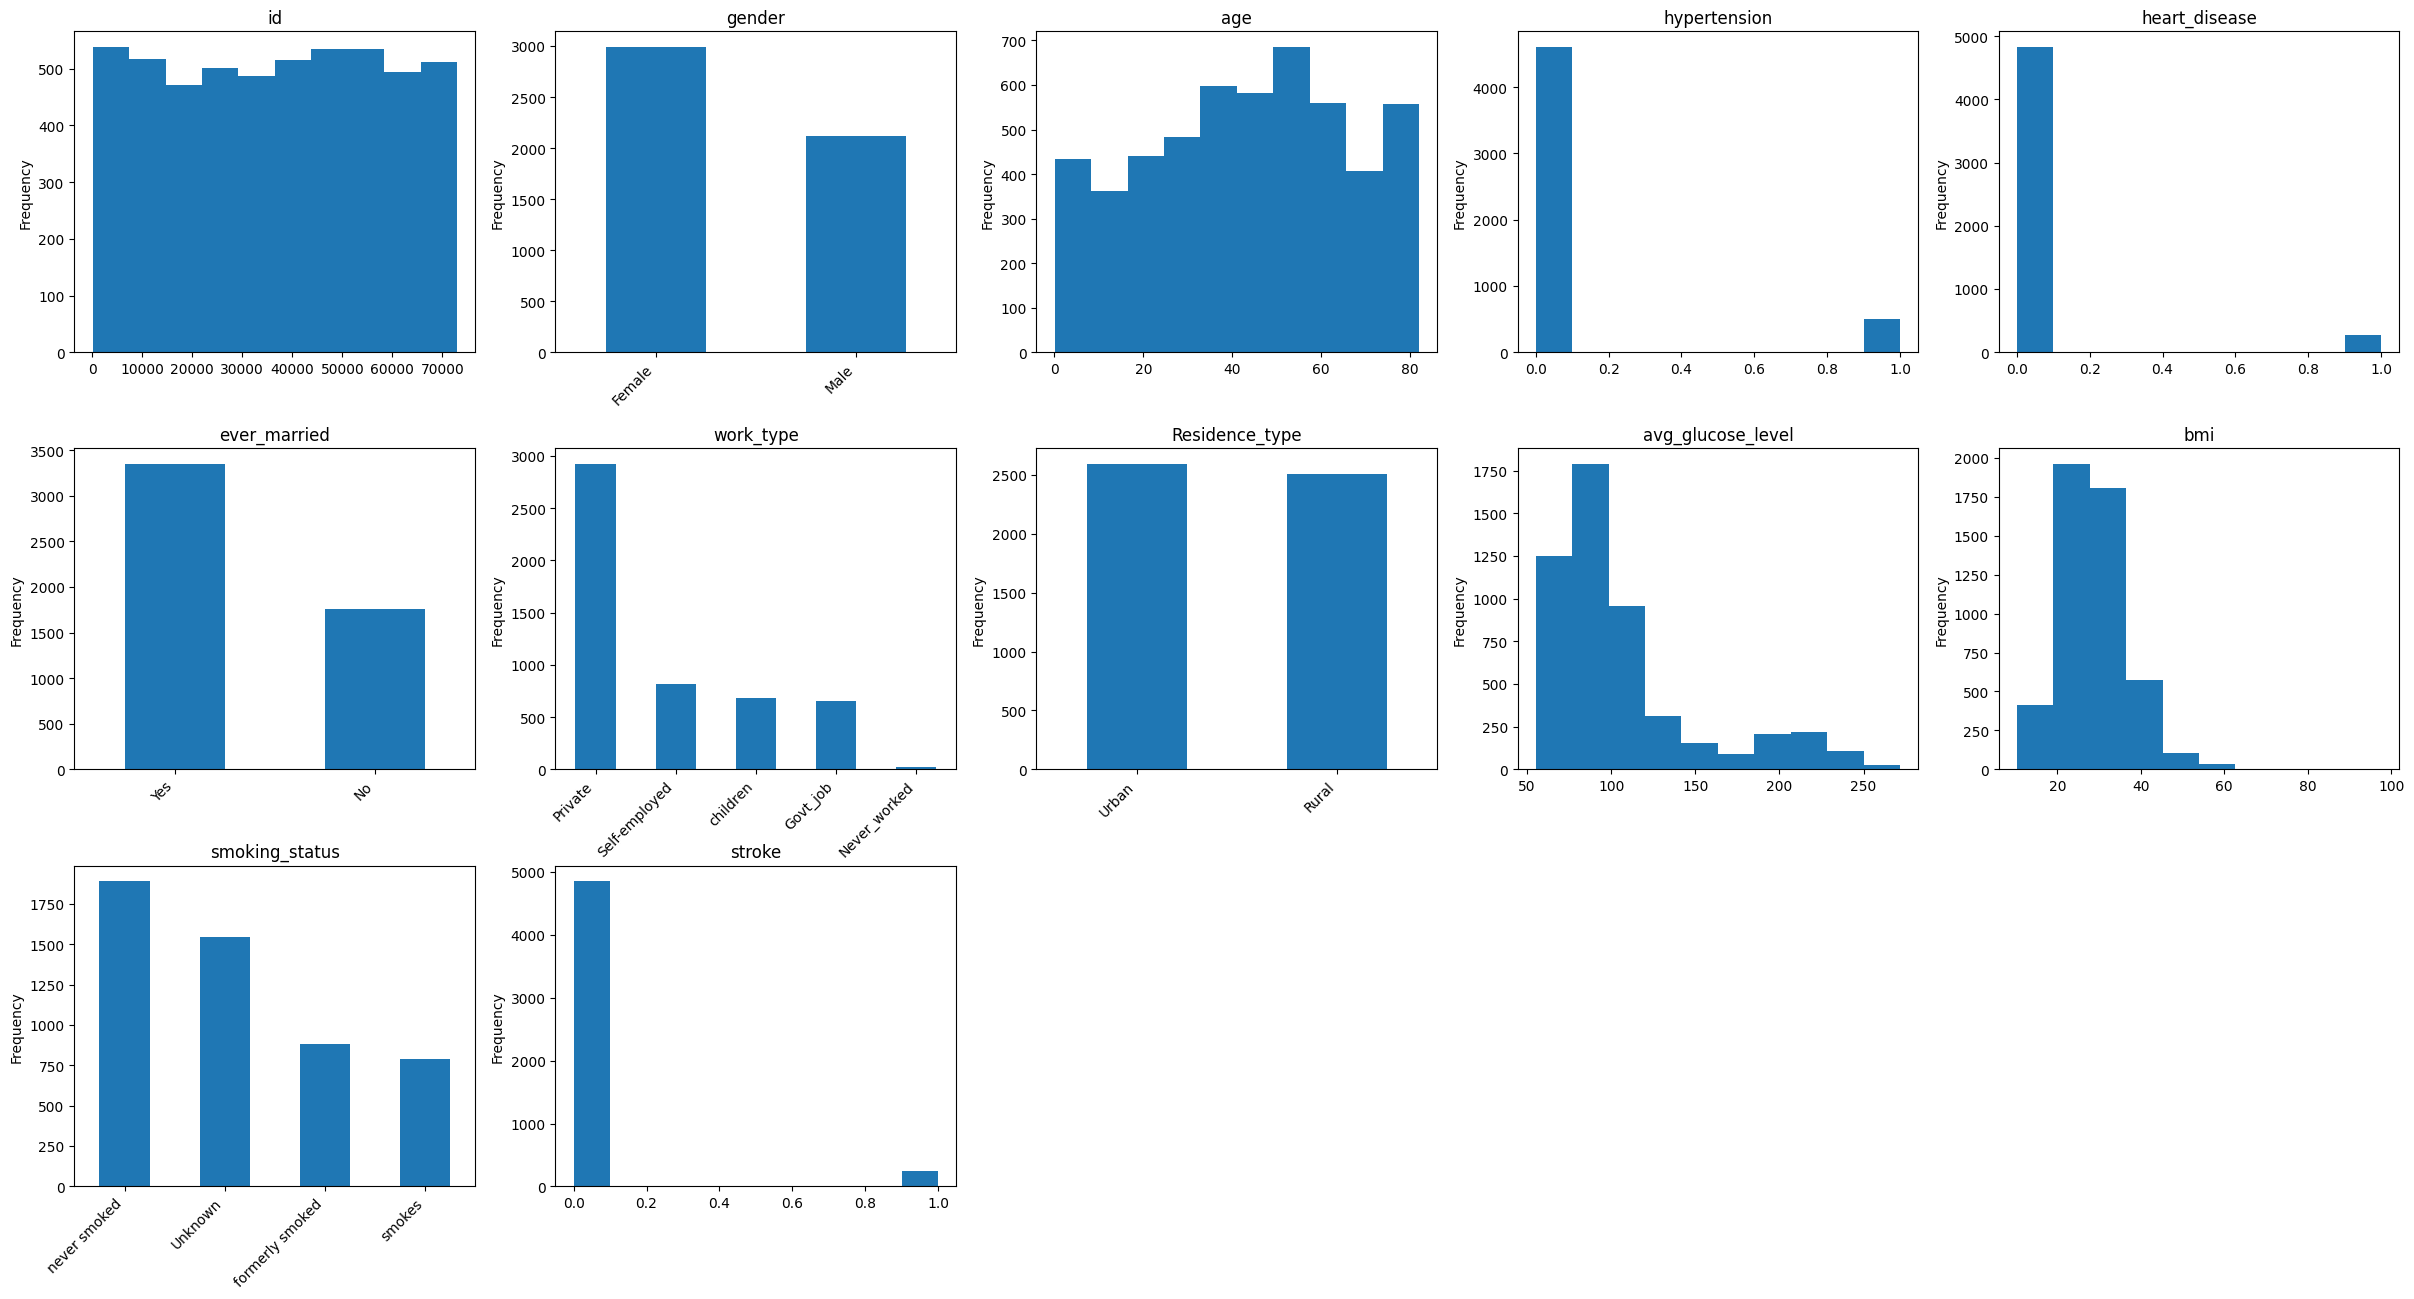

In [ ]:
# stroke.hist(figsize=(20, 15), layout=(3, 5))
import matplotlib.pyplot as plt
# numeric_cols = stroke.select_dtypes(include='number').columns
# stroke[numeric_cols].hist(figsize=(20, 15), layout=(3, 5))

# stroke.drop('id', axis=1, inplace=True)
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Adjust the space between subplots
axes = axes.ravel()

# axes[0].set_title("smoking_status")
# stroke["smoking_status"].value_counts().plot(kind='bar', ax=axes[0], figsize=(30, 15))

for i, col in enumerate(stroke.columns):
  print(i)
  if pd.api.types.is_numeric_dtype(stroke[col]):
    axes[i].set_title(col)
    stroke[col].plot(kind='hist', ax=axes[i], bins=10, figsize=(30, 15))
  else:
    axes[i].set_title(col)
    stroke[col].value_counts().plot(kind='bar', ax=axes[i], figsize=(30, 15))
    axes[i].set_xticklabels(stroke[col].value_counts().index, rotation=45, ha='right')
    axes[i].set_ylabel("Frequency")

for i in range(12, 15):
  fig.delaxes(axes[i])

plt.show()

<ipython-input-71-25a2e6bc3e29>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


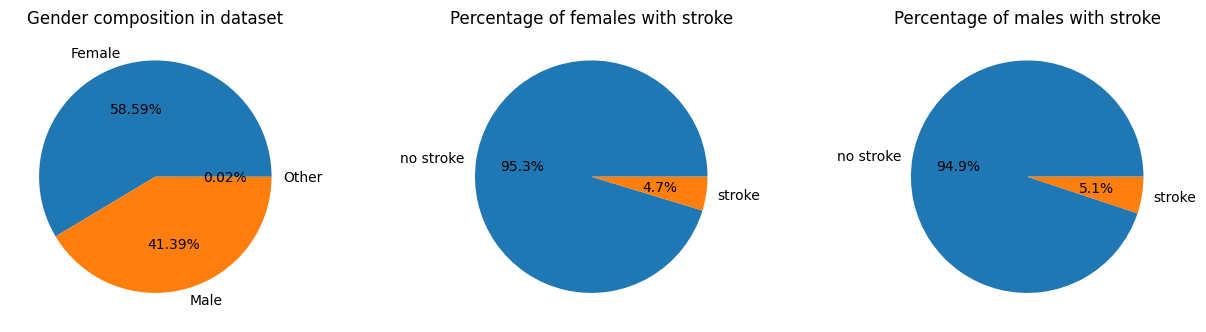

In [ ]:
import matplotlib.pyplot as plt

_, (a1, a2, a3) = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.5})

a1.set_title("Gender composition in dataset")
a1.pie(df["gender"].value_counts(), labels=df["gender"].value_counts().index, autopct="%1.2f%%")

a2.set_title("Percentage of females with stroke")
a2.pie(df[df["gender"] == "Female"]["stroke"].value_counts(), labels=["no stroke", "stroke"], autopct="%1.1f%%")

a3.set_title("Percentage of males with stroke")
a3.pie(df[df["gender"] == "Male"]["stroke"].value_counts(), labels=["no stroke", "stroke"], autopct="%1.1f%%")

plt.tight_layout()

In [ ]:
plt.pie(df["stroke"].value_counts(), labels=df["stroke"].value_counts().index, autopct="%1.2f%%")

In [ ]:
stroke.shape

(5109, 12)

In [ ]:
stroke.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.89456,1.376982,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.85432,1.071626,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.50000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.10000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.10000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.60000,3.000000,1.000000


In [ ]:
stroke['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

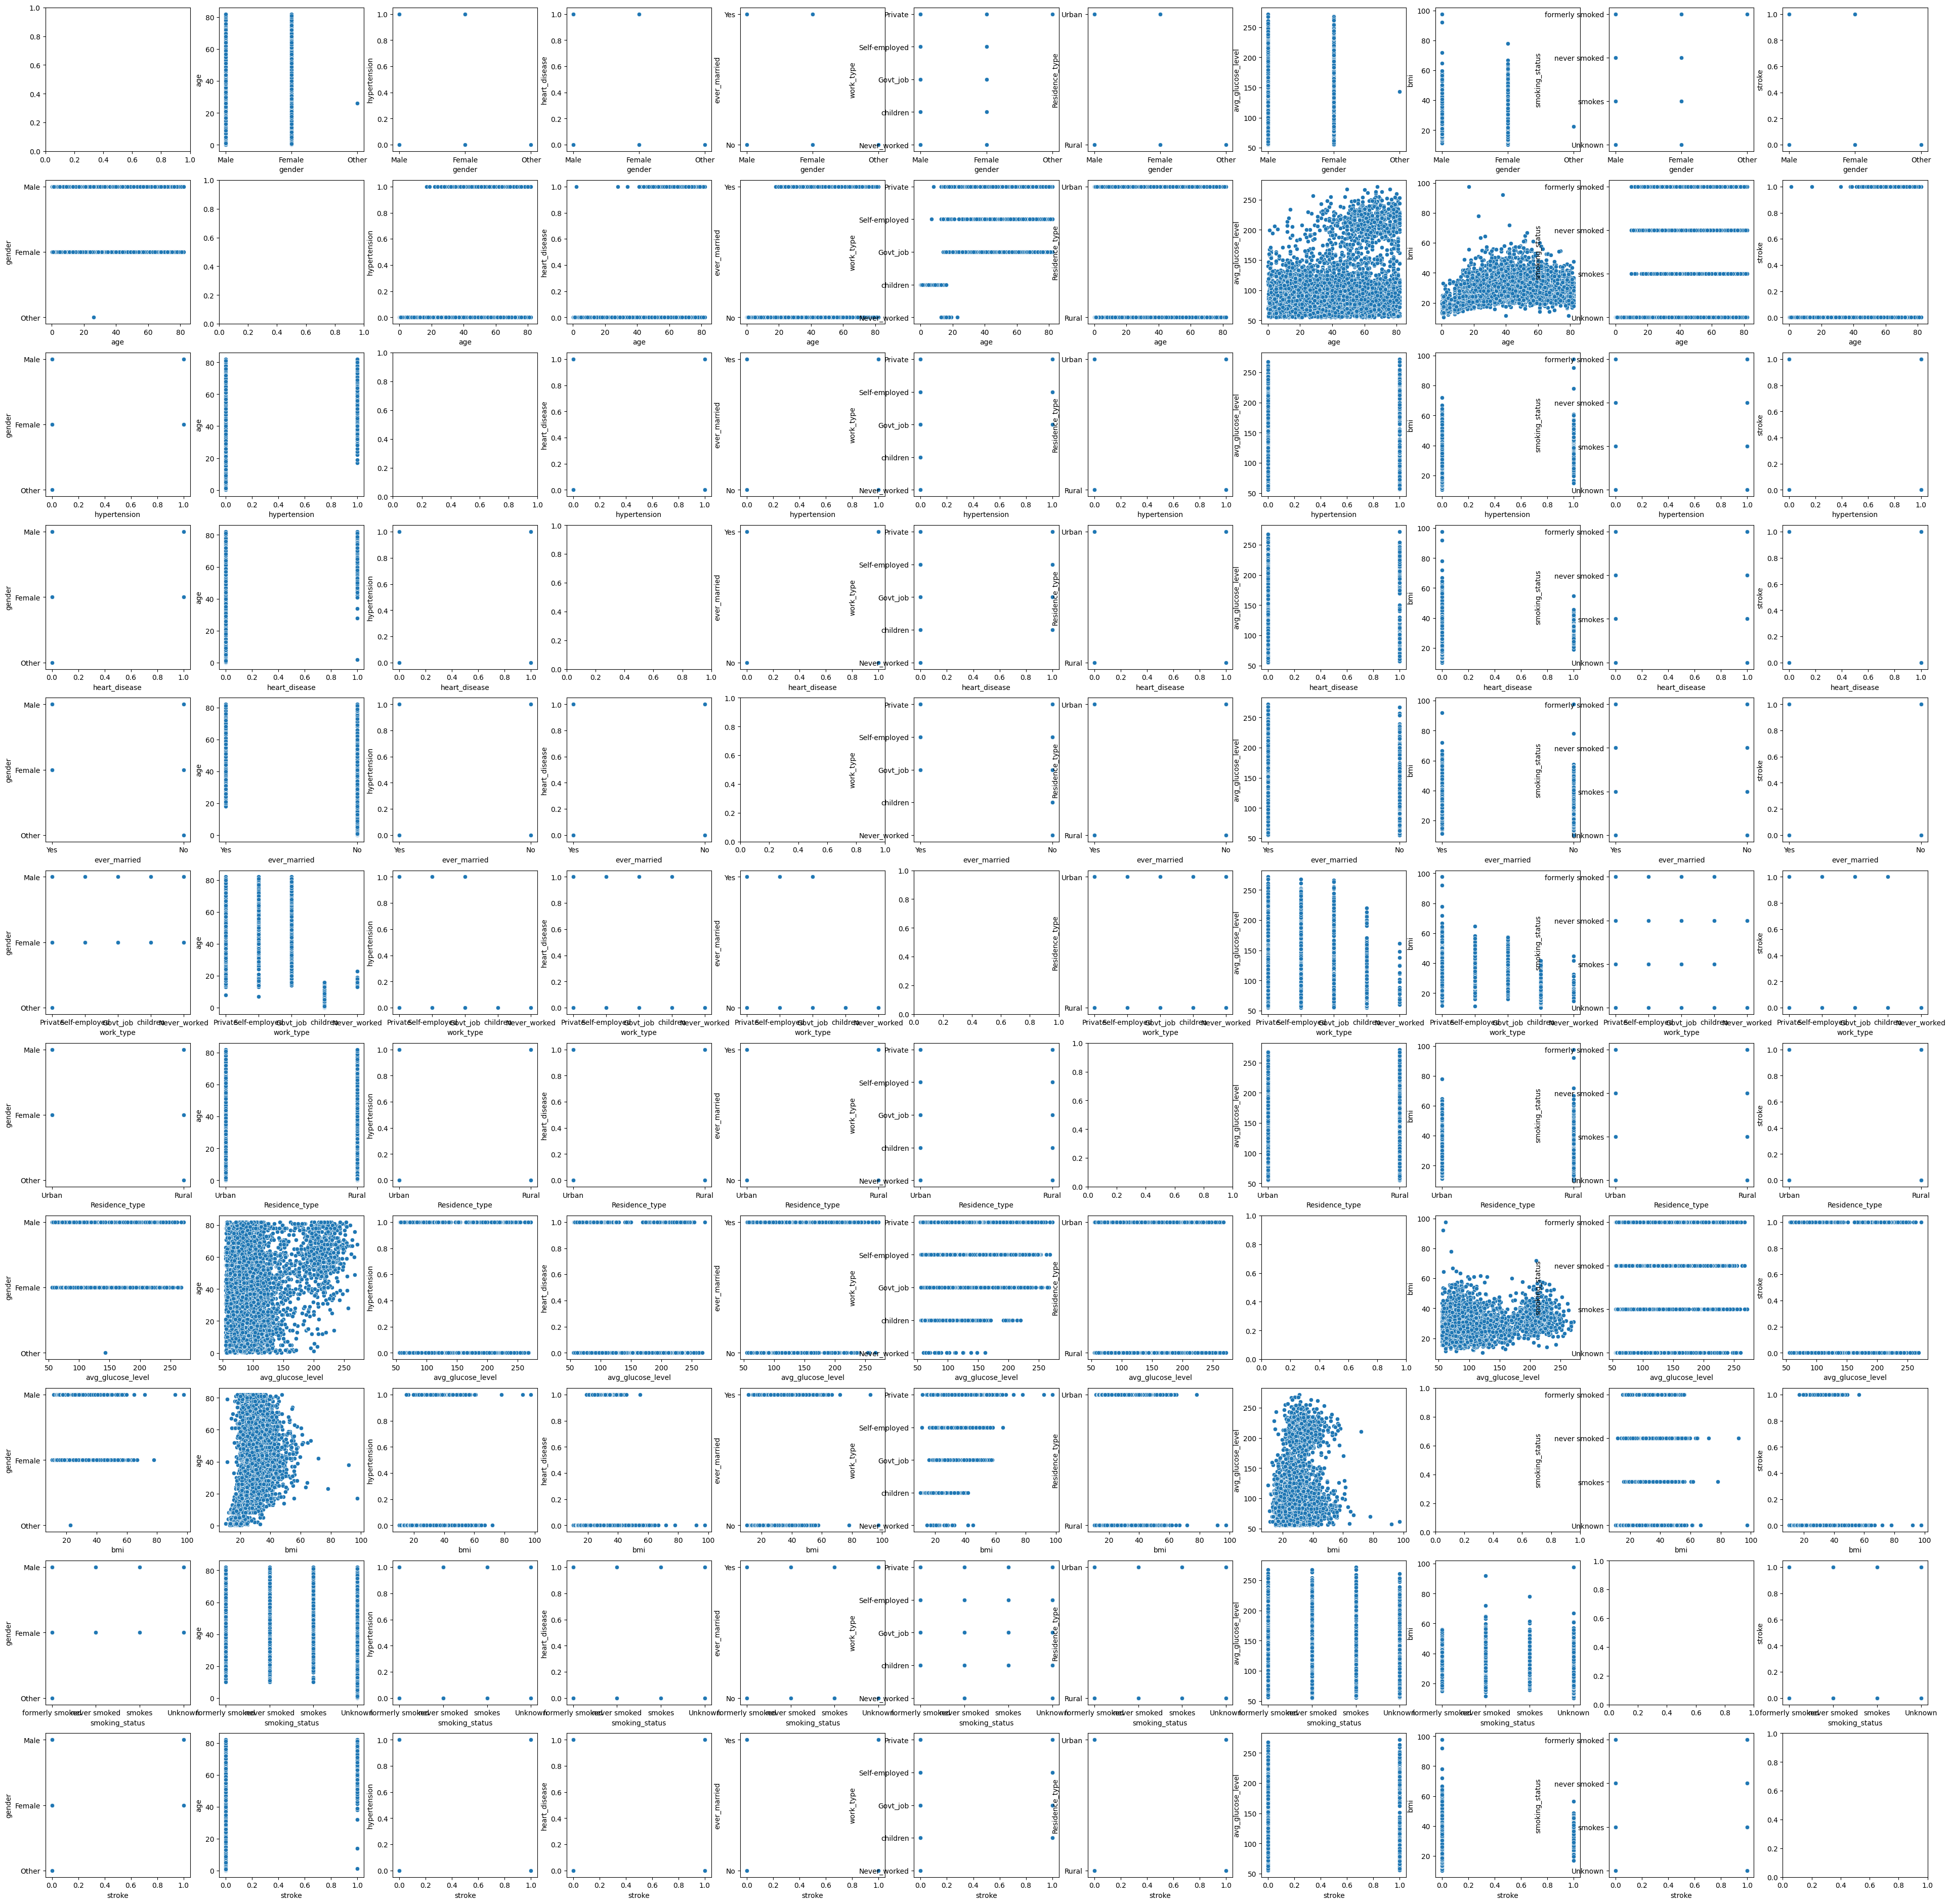

In [ ]:
import seaborn as sns
ok = stroke.drop('id', axis=1, inplace=False)

num_cols = len(ok.columns)

fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(48, 48))

# Scatter Plots
for i, col1 in enumerate(ok.columns):
    for j, col2 in enumerate(ok.columns):
        if col1 != col2:
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i, j])
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)

# plt.tight_layout()
plt.show()


In [ ]:
# import seaborn as sns

# sns.pairplot(stroke, hue="stroke")

In [ ]:
stroke.corr()

In [ ]:
stroke.duplicated().value_counts()

<Axes: >

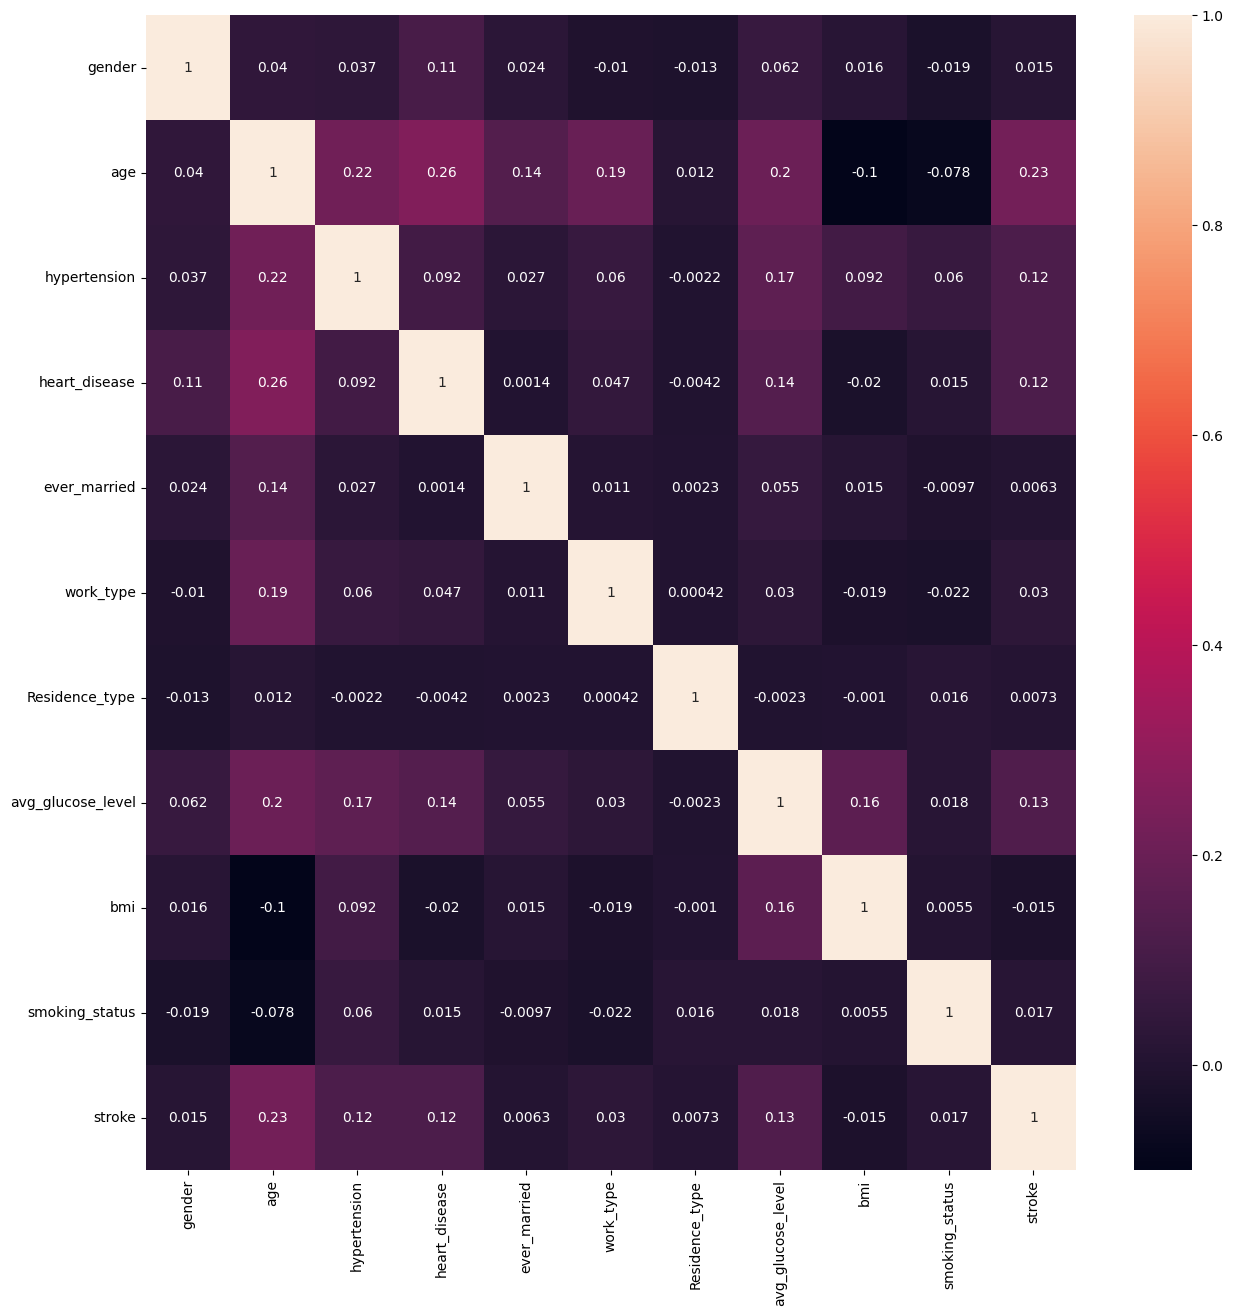

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_d = stroke.drop('id', axis=1, inplace=False).corr()

# stroke_correlation = corr_d['stroke'].drop('stroke')

plt.figure(figsize=(15, 15))
sns.heatmap(corr_d, annot=True)

# Pre-train and results


In [ ]:
# Dumb id column
stroke.drop('id', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from itertools import combinations
import numpy as np

new_stroke = stroke.copy()

# new_stroke = new_stroke.dropna()

new_stroke['labels'] = stroke['stroke']

new_stroke = new_stroke.drop('stroke', axis = 1, inplace = False)

value = new_stroke.drop('labels', axis = 1, inplace = False)
target = new_stroke['labels']

imputer = SimpleImputer(strategy='median')
value = pd.DataFrame(imputer.fit_transform(value))

# print(value.info())

x_train, x_test, y_train, y_test = train_test_split(value, target, test_size=0.2, random_state=30)

# Train


In [ ]:
import numpy as np

scaler = StandardScaler()
lr = LogisticRegression(random_state=42, max_iter=5000)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

lr_search = GridSearchCV(lr, {
  'penalty': ['l1', 'l2'],
  'C': np.logspace(-4, 4, 9),
  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
  'multi_class': ['ovr', 'multinomial'],
  'class_weight': [None, 'balanced'],
  'tol': [1e-4, 1e-3, 1e-2]
}, scoring="accuracy")

lr_search.fit(x_train_scaled, y_train)
print(lr_search.best_params_)
print("lr", lr_search.score(x_test_scaled, y_test))

NameError: ignored

In [ ]:
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis(random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

lda_search = GridSearchCV(lda, {
  'solver': ['svd', 'lsqr', 'eigen'],
  'shrinkage': ['auto', None, 0.1, 0.5, 0.9],
  # 'priors': [None, [0.2, 0.8], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.8, 0.2]],
  'tol': [1e-4, 1e-3, 1e-2]
}, scoring="accuracy")

lda_search.fit(x_train_scaled, y_train)
print(lda_search.best_params_)
print("lda", lda_search.score(x_test_scaled, y_test))

In [ ]:
knn = KNeighborsClassifier()

knn_search = GridSearchCV(knn, {
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'leaf_size': list(range(20, 40)),
  'n_neighbors': list(range(1, 25)),
  'p': list(range(10)),
  'weights': ['uniform', 'distance']
}, scoring="accuracy")

knn_search.fit(x_train, y_train)
print(knn_search.best_params_)
print("knn", knn_search.score(x_test, y_test))

In [ ]:
scaler = StandardScaler()
dtc = DecisionTreeClassifier(random_state=42)

dtc_search = GridSearchCV(dtc, {
  'max_depth': [None, 5, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'max_features': [None, 'sqrt', 'log2', 0.2, 0.5],
  'max_leaf_nodes': [None, 5, 10, 20],
  'criterion': ['gini', 'entropy', 'log_loss'],
  'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}, scoring="accuracy")

dtc_search.fit(x_train, y_train)
print(dtc_search.best_params_)
print("dtc", dtc_search.score(x_test, y_test))

{'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5}
dtc 0.9635036496350365


In [ ]:
scaler = StandardScaler()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

rfc_search = GridSearchCV(rfc, {
  'n_estimators': [100, 200, 300],
  'max_depth': [5],
  'min_samples_split': [5],
  'min_samples_leaf': [1],
  'max_features': [0.2],
  'max_leaf_nodes': [5],
  'criterion': ['gini'],
  'bootstrap': [True, False]
}, scoring="accuracy")

rfc_search.fit(x_train, y_train)
print(rfc_search.best_params_)
print("rfc", rfc_search.score(x_test, y_test))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
rfc 0.9635036496350365


In [ ]:
scaler = StandardScaler()
sgd = SGDClassifier(random_state=42, n_jobs=-1, max_iter=5000)

sgd_search = GridSearchCV(sgd, {
  'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
  'penalty': ['l1', 'l2'],
  'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
  'alpha': [0.0001, 0.001, 0.01, 0.1],
  'class_weight': [None, 'balanced'],
  'tol': [1e-3, 1e-4, 1e-5],
  'eta0': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
}, scoring="accuracy")

sgd_search.fit(x_train, y_train)
print(sgd_search.best_params_)
print("sgd", sgd_search.score(x_test, y_test))

{'alpha': 0.0001, 'class_weight': None, 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'penalty': 'l1', 'tol': 0.001}
sgd 0.9635036496350365


In [ ]:
ada_dtc = GridSearchCV(AdaBoostClassifier(), {
    "estimator": [DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5, max_features=0.2)],
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [1, 2, 3, 4, 5]
}, scoring="accuracy")

ada_dtc.fit(x_train, y_train)
print(ada_dtc.best_params_)
print("ada_dtc", ada_dtc.score(x_test, y_test))
print(ada_dtc.random_state)

{'estimator': DecisionTreeClassifier(max_depth=5, max_features=0.2, max_leaf_nodes=5,
                       min_samples_split=5, random_state=42), 'learning_rate': 3, 'n_estimators': 100}
ada_dtc 0.9635036496350365


# Results


In [ ]:
lr = Pipeline([
    ("std_scaler", StandardScaler()),
    ("lr", LogisticRegression(random_state=42, solver="liblinear", C=0.0001, penalty="l1"))
])

lda = Pipeline([
    ("std_scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

knn = KNeighborsClassifier(n_neighbors=6, p=1)

dtc = DecisionTreeClassifier(random_state=73787, criterion="entropy", max_depth=5, max_features=0.2)

rfc = RandomForestClassifier(random_state=42, criterion="entropy", max_depth=5, max_features=0.2, bootstrap=True, n_estimators=50)

sgd = SGDClassifier(random_state=42, max_iter=5000, loss="epsilon_insensitive", alpha=0.01)

models = [("lr", lr), ("lda", lda), ("knn", knn), ("dtc", dtc), ("rfc", rfc), ("sgd", sgd), ("ada_dtc", AdaBoostClassifier(DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5, max_features=0.2), n_estimators=300, learning_rate=4, random_state=45147))]

for i in models:
  i[1].fit(x_train, y_train)
  y_pred = i[1].predict(x_test)
  print(i[0], accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted"))

all_combinations = list(combinations(models[:-2], 3))

print(list(all_combinations[0]))
for i in all_combinations:
  print(i)
  vot = VotingClassifier(estimators=list(i), n_jobs=-1, voting="soft")

  vot.fit(x_train, y_train)
  y_pred = vot.predict(x_test)

  print(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted"))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


lr 0.9647749510763209 0.9307907062243175 0.9647749510763209 0.9474781890052314
lda 0.9569471624266145 0.934930733352413 0.9569471624266145 0.9450601797236698
knn 0.961839530332681 0.9306906544730358 0.961839530332681 0.9460087550204723
dtc 0.9628180039138943 0.9307240704500979 0.9628180039138943 0.9464990546950147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


rfc 0.9647749510763209 0.9307907062243175 0.9647749510763209 0.9474781890052314
sgd 0.9647749510763209 0.9307907062243175 0.9647749510763209 0.9474781890052314
ada_dtc 0.9667318982387475 0.9678408349641227 0.9667318982387475 0.9521307331481711
[('lr', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.0001, penalty='l1', random_state=42,
                                    solver='liblinear'))])), ('lda', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])), ('knn', KNeighborsClassifier(n_neighbors=6, p=1))]
(('lr', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.0001, penalty='l1', random_state=42,
                                    solver='liblinear'))])), ('lda', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])), ('knn', KNeighborsClassifier(n_neig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9647749510763209 0.9307907062243175 0.9647749510763209 0.9474781890052314
(('lr', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.0001, penalty='l1', random_state=42,
                                    solver='liblinear'))])), ('dtc', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=0.2,
                       random_state=73787)), ('rfc', RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.2,
                       n_estimators=50, random_state=42)))
0.9628180039138943 0.9307240704500979 0.9628180039138943 0.9464990546950147
(('lda', Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])), ('knn', KNeighborsClassifier(n_neighbors=6, p=1)), ('dtc', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=0.2,
                       random_state=73787)))
0.9637964774951077 0.9433791234643534 0.9637964774951077 0.9487